In [20]:
import matplotlib.pyplot as plt
# Image Loading
from PIL import Image
# Image Processing
import torchvision.transforms as transforms

In [21]:
"""
    1. Data Loading and Processing

    The code first loads an image named "Apple.jpg" using the PIL library.
    then uses torchvision.transforms to resize the image to 256x256 pixels and
    convert it into a PyTorch tensor. The tensor's shape is changed from (3,
    256, 256) to a NumPy array with the shape (256, 256, 3) to be correctly
    visualized by Matplotlib.
"""
# 1.1 load apple photo
# img_path = "Apple.jpg"
img_path = "banana.jpg"
img = Image.open(img_path)

# 1.2 to tensor conversion
tf = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
img_tensor = tf(img)
print(img_tensor.shape)
print(img_tensor[0,128])


torch.Size([3, 256, 256])
tensor([0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255, 0.9255,
        0.9255

In [22]:
# 1.3 tensor to numpy array [256, 256, 3]
img_ndarray = img_tensor.numpy().transpose((1, 2, 0))
print(img_ndarray.shape)

(256, 256, 3)


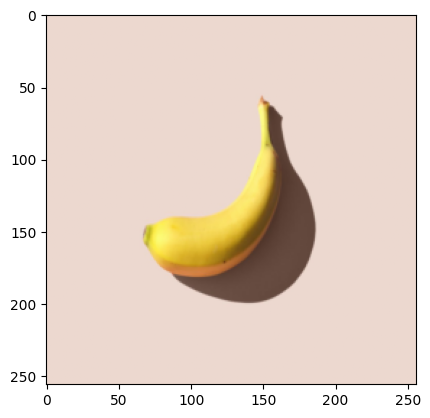

In [23]:
# 1.4 visualize the photo
plt.imshow(img_ndarray)
# plt.axis('off')
plt.show()

In [24]:
"""
    2. Model Creation - Autoencoder

    This model consists of two parts:

    Encoder: This section uses two Conv2d layers followed by MaxPool2d layers
    to progressively reduce the image's dimensions and compress its features.
    The input is a 3-channel image, and the encoder outputs an 8-channel
    compressed representation.

    Decoder: This section uses two ConvTranspose2d (transposed convolution)
    layers to decompress the encoded features and reconstruct the image,
    bringing the channel count back to 3.
"""
import torch
import torch.nn as nn

In [25]:
# 2.1 Autoencoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            # the first convolutional and pooling layer
            nn.Conv2d(in_channels=3,
                      out_channels=16,
                      kernel_size=3, # K = 2P + 1
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # the second convolutional and pooling layer
            nn.Conv2d(16,8,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=8,
                               out_channels=16,
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,
                               kernel_size=3,
                               stride=2,
                               padding= 1,
                               output_padding=1),
            nn.Sigmoid()

        )

    def forward(self, x):
        x = self.encoder(x)
        # print(x.shape)
        x = self.decoder(x)
        # print(x.shape)
        return x

model = AutoEncoder()
# Inference (Test Forward Propagation)
# N C H W
y = model(torch.randn(1, 3, 256, 256))
print(y.shape)

torch.Size([1, 3, 256, 256])


In [26]:
"""
    3. Model Training

    The model is trained for 400 epochs on the single apple image. The
    training loop performs these steps repeatedly:

    Forward Propagation: The image tensor is fed into the autoencoder to get a
    reconstructed image.

    Loss Calculation: The Mean Squared Error (MSE) loss function is used to
    measure the difference between the reconstructed image and the original
    image.

    Backpropagation: The loss value is used to calculate the gradients for
    each parameter in the model.

    Weight Update: An Adam optimizer adjusts the model's weights to minimize
    the loss.
"""
import torch.optim as optim

In [27]:
# 3.1 define the loss function and the optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# 3.2 number of training epochs
epochs_num = 400

In [28]:
# 3.3 training an Autoencoder
for epoch in range(epochs_num):
    output = model(img_tensor) # Forward Propagation
    loss_value = loss(output, img_tensor) # Loss Calculation
    loss_value.backward() # backpropagation
    optimizer.step() # Weight Update
    optimizer.zero_grad()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch: {epoch + 1}/{epochs_num}, Loss: {loss_value.item():.4f}")

Epoch: 10/400, Loss: 0.1172
Epoch: 20/400, Loss: 0.0950
Epoch: 30/400, Loss: 0.0492
Epoch: 40/400, Loss: 0.0294
Epoch: 50/400, Loss: 0.0245
Epoch: 60/400, Loss: 0.0195
Epoch: 70/400, Loss: 0.0173
Epoch: 80/400, Loss: 0.0159
Epoch: 90/400, Loss: 0.0151
Epoch: 100/400, Loss: 0.0144
Epoch: 110/400, Loss: 0.0136
Epoch: 120/400, Loss: 0.0127
Epoch: 130/400, Loss: 0.0117
Epoch: 140/400, Loss: 0.0108
Epoch: 150/400, Loss: 0.0098
Epoch: 160/400, Loss: 0.0092
Epoch: 170/400, Loss: 0.0089
Epoch: 180/400, Loss: 0.0086
Epoch: 190/400, Loss: 0.0083
Epoch: 200/400, Loss: 0.0080
Epoch: 210/400, Loss: 0.0077
Epoch: 220/400, Loss: 0.0074
Epoch: 230/400, Loss: 0.0071
Epoch: 240/400, Loss: 0.0068
Epoch: 250/400, Loss: 0.0065
Epoch: 260/400, Loss: 0.0063
Epoch: 270/400, Loss: 0.0061
Epoch: 280/400, Loss: 0.0059
Epoch: 290/400, Loss: 0.0057
Epoch: 300/400, Loss: 0.0055
Epoch: 310/400, Loss: 0.0053
Epoch: 320/400, Loss: 0.0051
Epoch: 330/400, Loss: 0.0049
Epoch: 340/400, Loss: 0.0046
Epoch: 350/400, Loss: 0

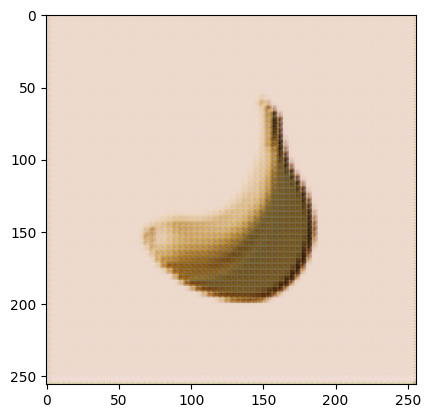

In [29]:
"""
    4. Image Reconstruction

    After training, the model's weights are frozen (torch.no_grad()). The
    original image is fed into the trained autoencoder one last time to
    produce the final reconstructed image. This image is then converted back
    into a NumPy array and displayed using Matplotlib, so you can see the
    result of the autoencoder's work.
"""
with torch.no_grad():
    # forward propagation
    img_recon = model(img_tensor)

img_ndarray2 = img_recon.numpy().transpose((1, 2, 0))
plt.imshow(img_ndarray2)
# plt.axis('off')
plt.show()